In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import preprocessing
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [149]:
data = pd.read_csv("../Data/Clean_MOLD_V2.csv")
data.head(5)

,tweet,subtask_a,subtask_b,subtask_c
0,पूर्व लडाखमधील मुखपरी येथे प्रत्यक्ष ताबारेषेज...,not offensive,NaN,NaN
1,कोणत्याही रिलेशनशिप मध्ये सुंदर दिसणं खूप महत...,not offensive,NaN,NaN
2,भारत ऑगस्ट ला स्वतंत्र झाला आणि त्यानंतर तब्...,not offensive,NaN,NaN
3,स्वत ला हवा तसा बाइट किंवा प्रतिक्रिया घेण्यास...,not offensive,NaN,NaN
4,व्या नंबरची अर्थव्यवस्था आहे भारताची जगात पर्...,not offensive,NaN,NaN


In [150]:
data = data.astype(object).replace(np.nan,'NULL')
data.head(5)

,tweet,subtask_a,subtask_b,subtask_c
0,पूर्व लडाखमधील मुखपरी येथे प्रत्यक्ष ताबारेषेज...,not offensive,NULL,NULL
1,कोणत्याही रिलेशनशिप मध्ये सुंदर दिसणं खूप महत...,not offensive,NULL,NULL
2,भारत ऑगस्ट ला स्वतंत्र झाला आणि त्यानंतर तब्...,not offensive,NULL,NULL
3,स्वत ला हवा तसा बाइट किंवा प्रतिक्रिया घेण्यास...,not offensive,NULL,NULL
4,व्या नंबरची अर्थव्यवस्था आहे भारताची जगात पर्...,not offensive,NULL,NULL


In [151]:
data.subtask_a.unique()

array(['not offensive', 'Offensive', 'offensive', 'Non-Offensive',
       'Offensive ', 'Non-Offensive '], dtype=object)

In [152]:
data['subtask_a'] = data['subtask_a'].replace({"Non-Offensive":"not offensive","Non-Offensive ":"not offensive"})
data.subtask_a.unique()

array(['not offensive', 'Offensive', 'offensive', 'Offensive '],
      dtype=object)

In [153]:
data['subtask_a'] = data['subtask_a'].replace({"offensive":"Offensive","Offensive ":"Offensive"})
data.subtask_a.unique()

array(['not offensive', 'Offensive'], dtype=object)

In [154]:
data['subtask_a'].value_counts()

not offensive    2291
Offensive        1071
Name: subtask_a, dtype: int64

In [155]:
data['subtask_b'].value_counts()

NULL    2292
TIN      742
UNT      328
Name: subtask_b, dtype: int64

In [156]:
data['subtask_c'].value_counts()

NULL    2621
IND      504
GRP      157
OTH       79
OHT        1
Name: subtask_c, dtype: int64

In [157]:
data['subtask_c'] = data['subtask_c'].replace({"OHT":"OTH"})
data.subtask_c.unique()

array(['NULL', 'GRP', 'IND', 'OTH'], dtype=object)

In [158]:
data.describe()

,tweet,subtask_a,subtask_b,subtask_c
count,3362,3362,3362,3362
unique,3341,2,3,4
top,तुमच्या तोंडात साखर पडो,not offensive,NULL,NULL
freq,3,2291,2292,2621


In [160]:
data.to_csv('../Data/MOLDV2.csv',index = False)

In [ ]:
properClasses = pd.read_csv('../Data/MOLDV2.csv')

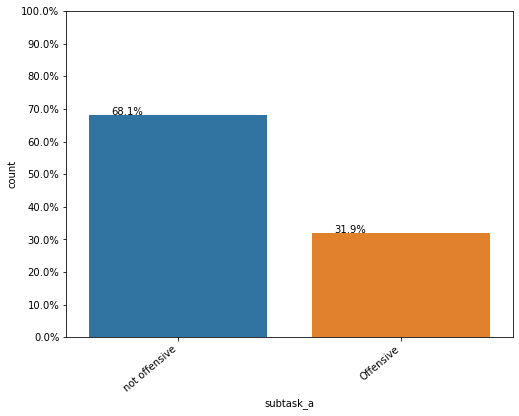

In [140]:
plt.figure(figsize=(8,6))
Y = data['subtask_a']
total = len(Y) * 1
ax=sns.countplot(x="subtask_a", data=data)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

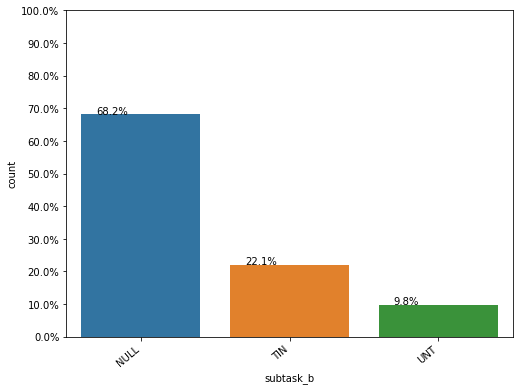

In [141]:
plt.figure(figsize=(8,6))
Y = data['subtask_b'] != 'NULL'
total = len(Y) * 1
ax=sns.countplot(x="subtask_b", data=data)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

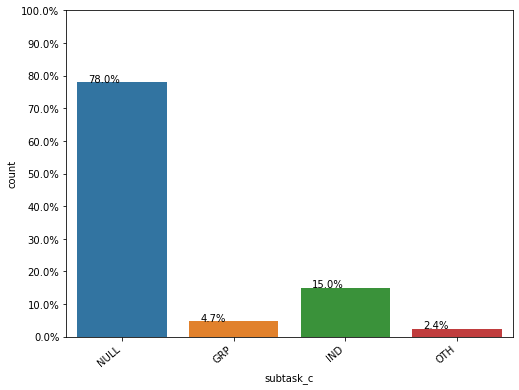

In [142]:
plt.figure(figsize=(8,6))
Y = data['subtask_c']
total = len(Y) * 1
ax=sns.countplot(x="subtask_c", data=data)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

<AxesSubplot:>

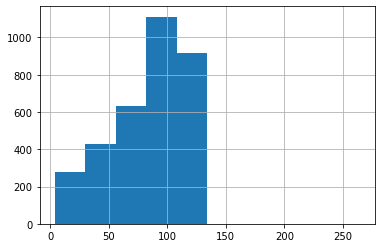

In [143]:
data['tweet'].str.len().hist()

### It is clear that the number of words in the tweets that tweets ranges from around 5 to 125 and mostly falls between 50 - 125 words

<AxesSubplot:>

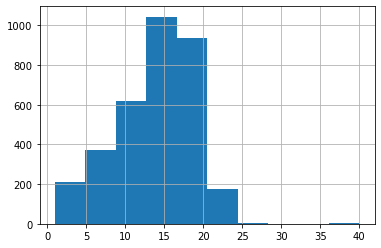

In [144]:
data['tweet'].str.split().\
    map(lambda x: len(x)).\
    hist()

It is clear that the number of words in news headlines ranges from 1 to 25 and mostly falls between 10 to 20 words.

<AxesSubplot:>

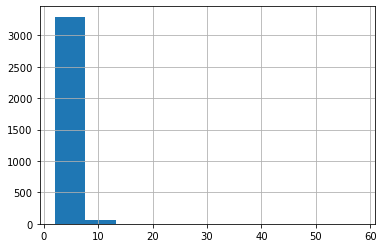

In [145]:
data['tweet'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

#### The average word length ranges between around 2 to 6 with 4-5 being the most common length. Does it mean that people are using really short words in tweets?

In [146]:
print("There are {} observations and {} features in this dataset. \n".format(data.shape[0],data.shape[1]))

There are 3362 observations and 4 features in this dataset. 



In [147]:
# word_cloud is difficult for Marathi corpus
tweet = data.tweet[0]
tweet = tweet.encode("utf-8").decode("utf-8")
print((tweet))
wordcloud = WordCloud().generate(tweet)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()